# Intro - Analyzing subway and weather data

How ridership changes when it starts raining?

How does it change from summet to winter?

Which stops are most and least popular?

How ridership is affected by some cultural events - identify the biggest changes in regular usage.

Were there some stops in operating of some of the stations?

---

What variables are related to subway ridership?

Which stations have the most riders?

Ridership patterns over time - how it changes during the day and month?

Will memorial day ridership will be similar to weekend day ridership?

How weather affects ridership?



## Two-dimensional Data 
Python: List of lists

NumPy: 2D array

Pandas: DataFrame

2D array, as opposed to array of arrays:
- Memory efficient
- Different elements accesing
`a[1, 3]` rather than `a[1][3]` - row
- mean(), std(). etc. operate on entire array

In [54]:
import numpy as np

# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

# Accessing elements
print(ridership[1, 3])
print(ridership[1:3, 3:5])
print(ridership[1, :])

2328
[[2328 2539]
 [6461 2691]]
[1478 3877 3674 2328 2539]


In [55]:
# Vectorized operations on rows or columns
print(ridership[0, :] + ridership[1, :])
print(ridership[:, 0] + ridership[:, 1])

[1478 3877 3676 2333 2539]
[   0 5355 5701 4952 6410 5509  324    2 5223 5385]


In [56]:
# Vectorized operations on entire arrays
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
print(a + b)

[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [57]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    Hint: NumPy's argmax() function might be useful:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html
    '''
    max_station_idx = np.argmax(ridership[0, :])
    overall_mean = ridership.mean()
    mean_for_max = ridership[:, max_station_idx].mean()
    
    return (overall_mean, mean_for_max)

mean_riders_for_max_station(ridership)

(2342.5999999999999, 3239.9000000000001)

The max station had much higher mean than the overall stations average.

## Operations along an Axis

Many NumPy functions like mean() opearate on an array as a whole. But in many cases it might make sense to calculate the operation by row or by column.

Most of NumPy function take an axis argument for this reason - 0 or 1
- 0 calculates for each column
- 1 calculates for each row

In [58]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print(a.sum())
print(a.sum(axis=0)) # sum rows!
print(a.sum(axis=1)) # sum columns!

45
[12 15 18]
[ 6 15 24]


In [59]:
# Subway ridership for 5 stations on 10 different days
ridership = np.array([
    [   0,    0,    2,    5,    0],
    [1478, 3877, 3674, 2328, 2539],
    [1613, 4088, 3991, 6461, 2691],
    [1560, 3392, 3826, 4787, 2613],
    [1608, 4802, 3932, 4477, 2705],
    [1576, 3933, 3909, 4979, 2685],
    [  95,  229,  255,  496,  201],
    [   2,    0,    1,   27,    0],
    [1438, 3785, 3589, 4174, 2215],
    [1342, 4043, 4009, 4665, 3033]
])

def min_and_max_riders_per_day(ridership):
    '''
    Fill in this function. First, for each subway station, calculate the
    mean ridership per day. Then, out of all the subway stations, return the
    maximum and minimum of these values. That is, find the maximum
    mean-ridership-per-day and the minimum mean-ridership-per-day for any
    subway station.
    '''
    stations_means = ridership.mean(axis=0)
    max_daily_ridership = stations_means.max()    # Replace this with your code
    min_daily_ridership = stations_means.min()     # Replace this with your code
    
    return (max_daily_ridership, min_daily_ridership)

min_and_max_riders_per_day(ridership)

(3239.9000000000001, 1071.2)

Maximal and minimal ridership means for different stations.

Which stations are these?

## NumPy And Pandas Data Types

In [60]:
np.array([1, 2, 3, 4, 5]).dtype

dtype('int64')

It is difficult or impossible to store different types of data - like strings and floats - in array.

The solution is to store the complex data in DataFrame.

## Accessing Elements Of A DataFrame

Use .loc[] to access a single row of a data in DataFrame by indexes (THEIR NAMES!).

Use .iloc[] to access a single row of data in DataFrame by positions (INDEX NUMBER).

To access a single element of a DataFrame you can also use .loc and .iloc but indicating both a row and a column.

You can also access columns using square brackets.

In [61]:
import pandas as pd

# You can create a DataFrame out of a dictionary mapping column names to values
df_1 = pd.DataFrame({"A": [0, 1, 2], "B": [3, 4, 5]})
df_1

,A,B
0,0,3
1,1,4
2,2,5


In [62]:
# You can also use a list of lists or a 2D NumPy array
df_2 = pd.DataFrame([[0, 1, 2], [3, 4, 5]], columns=["A", "B", "C"])
df_2

,A,B,C
0,0,1,2
1,3,4,5


In [63]:
ridership_df = pd.DataFrame(
    data=[[   0,    0,    2,    5,    0],
          [1478, 3877, 3674, 2328, 2539],
          [1613, 4088, 3991, 6461, 2691],
          [1560, 3392, 3826, 4787, 2613],
          [1608, 4802, 3932, 4477, 2705],
          [1576, 3933, 3909, 4979, 2685],
          [  95,  229,  255,  496,  201],
          [   2,    0,    1,   27,    0],
          [1438, 3785, 3589, 4174, 2215],
          [1342, 4043, 4009, 4665, 3033]],
    index=['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
           '05-06-11', '05-07-11', '05-08-11', '05-09-11', '05-10-11'],
    columns=['R003', 'R004', 'R005', 'R006', 'R007']
)
ridership_df

,R003,R004,R005,R006,R007
05-01-11,0,0,2,5,0
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613
05-05-11,1608,4802,3932,4477,2705
05-06-11,1576,3933,3909,4979,2685
05-07-11,95,229,255,496,201
05-08-11,2,0,1,27,0
05-09-11,1438,3785,3589,4174,2215
05-10-11,1342,4043,4009,4665,3033


In [64]:
# Accessing elements.
print(ridership_df.iloc[0])
print(ridership_df.loc["05-05-11"])
print(ridership_df["R003"])
print(ridership_df.iloc[1, 3])

R003    0
R004    0
R005    2
R006    5
R007    0
Name: 05-01-11, dtype: int64
R003    1608
R004    4802
R005    3932
R006    4477
R007    2705
Name: 05-05-11, dtype: int64
05-01-11       0
05-02-11    1478
05-03-11    1613
05-04-11    1560
05-05-11    1608
05-06-11    1576
05-07-11      95
05-08-11       2
05-09-11    1438
05-10-11    1342
Name: R003, dtype: int64
2328


In [65]:
# Accessing multiple rows
ridership_df.iloc[1:4]

,R003,R004,R005,R006,R007
05-02-11,1478,3877,3674,2328,2539
05-03-11,1613,4088,3991,6461,2691
05-04-11,1560,3392,3826,4787,2613


In [66]:
# Accessing multiple columns
ridership_df[["R003", "R005"]]

,R003,R005
05-01-11,0,2
05-02-11,1478,3674
05-03-11,1613,3991
05-04-11,1560,3826
05-05-11,1608,3932
05-06-11,1576,3909
05-07-11,95,255
05-08-11,2,1
05-09-11,1438,3589
05-10-11,1342,4009


In [67]:
# Pandas axis
df = pd.DataFrame({"A": [0, 1, 2], "B": [3, 4, 5]})
df

,A,B
0,0,3
1,1,4
2,2,5


In [68]:
df.sum()

A     3
B    12
dtype: int64

In [69]:
df.sum(axis=0)

A     3
B    12
dtype: int64

In [70]:
df.sum(axis=1)

0    3
1    5
2    7
dtype: int64

In [71]:
df.values.sum()

15

In [72]:
# Returns not index but column name!
df.iloc[0].argmax() 

'B'

In [73]:
def mean_riders_for_max_station(ridership):
    '''
    Fill in this function to find the station with the maximum riders on the
    first day, then return the mean riders per day for that station. Also
    return the mean ridership overall for comparsion.
    
    This is the same as a previous exercise, but this time the
    input is a Pandas DataFrame rather than a 2D NumPy array.
    '''
    
    max_station = ridership.iloc[0].argmax()
    
    overall_mean = ridership.values.mean() # Replace this with your code
    mean_for_max = ridership[max_station].mean() # Replace this with your code
    
    return (overall_mean, mean_for_max)

In [74]:
mean_riders_for_max_station(ridership_df)

(2342.5999999999999, 3239.9)

## Loading Data Into A DataFrame

DataFrames are a great data structure to represent CSV!

In [75]:
subway_df = pd.read_csv("nyc_subway_weather.csv")

In [76]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [77]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


## DataFrame Vectorized Operations

Similar to vectorized operations for 2d NumPy arrays.

Match elements by index and column name rather than position.

In [78]:
# Adding DataFrames with the same column names
df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
df2 = pd.DataFrame({"a": [10, 20, 30], "b": [40, 50, 60], 'c': [70, 80, 90]})

In [79]:
df1

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [80]:
df2

,a,b,c
0,10,40,70
1,20,50,80
2,30,60,90


In [81]:
df1 + df2

,a,b,c
0,11,44,77
1,22,55,88
2,33,66,99


In [82]:
# Adding DataFrames with overlapping column names
df1 = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
df2 = pd.DataFrame({"d": [10, 20, 30], "c": [40, 50, 60], "b": [70, 80, 90]})

In [83]:
df1

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [84]:
df2

,b,c,d
0,70,40,10
1,80,50,20
2,90,60,30


In [85]:
df1 + df2

,a,b,c,d
0,NaN,74,47,NaN
1,NaN,85,58,NaN
2,NaN,96,69,NaN


In [86]:
# Adding DataFrames with overlapping row indexes
df1 = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]},
                  index=["row1", "row2", "row3"])
df2 = pd.DataFrame({"a": [10, 20, 30], "b": [40, 50, 60], "c": [70, 80, 90]},
                  index=["row4", "row3", "row2"])

In [87]:
df1

,a,b,c
row1,1,4,7
row2,2,5,8
row3,3,6,9


In [88]:
df2

,a,b,c
row4,10,40,70
row3,20,50,80
row2,30,60,90


In [89]:
df1 + df2

,a,b,c
row1,NaN,NaN,NaN
row2,32.0,65.0,98.0
row3,23.0,56.0,89.0
row4,NaN,NaN,NaN


## Difference from columns

In [39]:
entries_and_exits = pd.DataFrame({
    'ENTRIES': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITS': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
entries_and_exits

,ENTRIES,EXITS
0,3144312,1088151
1,3144335,1088159
2,3144353,1088177
3,3144424,1088231
4,3144594,1088275
5,3144808,1088317
6,3144895,1088328
7,3144905,1088331
8,3144941,1088420
9,3145094,1088753


In [91]:
entries_and_exits.diff()

,ENTRIES,EXITS
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


##  DataFrame applymap()

Similar to Series apply().

It affects whole DataFrame.

In [92]:
entries_and_exits = pd.DataFrame({
    'ENTRIES': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITS': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
entries_and_exits

,ENTRIES,EXITS
0,3144312,1088151
1,3144335,1088159
2,3144353,1088177
3,3144424,1088231
4,3144594,1088275
5,3144808,1088317
6,3144895,1088328
7,3144905,1088331
8,3144941,1088420
9,3145094,1088753


In [93]:
df1 = pd.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6], "c": [7, 8, 9]})
df1

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [94]:
df1.applymap(lambda x: x * 2)

,a,b,c
0,2,8,14
1,4,10,16
2,6,12,18


## DataFrame apply() and qcut()

Applies function on each column (Series) of data in the DataFrame.

The application of this function are operations that depend on entire column values.

In [95]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


### Convert grades using qcut

In [96]:
# qcut() operates on a list, array, or Series. This is the
# result of running the function on a single column of the
# DataFrame.
pd.qcut(grades_df['exam1'],
        [0, 0.1, 0.2, 0.5, 0.8, 1],
        labels=['F', 'D', 'C', 'B', 'A'])

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]

In [103]:
# qcut() does not work on DataFrames, but we can use apply()
# to call the function on each column separately

def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
    
grades_df.apply(convert_grades_curve)

,exam1,exam2
Andre,F,F
Barry,B,B
Chris,C,C
Dan,C,C
Emilio,B,B
Fred,C,C
Greta,A,A
Humbert,D,D
Ivan,A,A
James,B,B


### Standardize DataFrame

In [104]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

df

,a,b,c
0,4,20,25
1,5,10,20
2,3,40,5
3,1,50,15
4,2,30,10


In [107]:
def std_series(col):
    return (col - col.mean()) / col.std(ddof = 0)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    return df.apply(std_series)

In [108]:
standardize(df)

,a,b,c
0,0.707107,-0.707107,1.414214
1,1.414214,-1.414214,0.707107
2,0.000000,0.707107,-1.414214
3,-1.414214,1.414214,0.000000
4,-0.707107,0.000000,-0.707107


### apply() and reducing DataFrame to a Series

In [109]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})
df

,a,b,c
0,4,20,25
1,5,10,20
2,3,40,5
3,1,50,15
4,2,30,10


In [110]:
df.apply(np.max)

a     5
b    50
c    25
dtype: int64

Same as df.max().

In [111]:
df.max()

a     5
b    50
c    25
dtype: int64

### apply() and second largest elements

In [112]:
 def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(second_largest_in_col)

def second_largest_in_col(column):
    return column.sort_values(ascending=False).iloc[1]
   

In [113]:
second_largest_in_col(df['a'])

4

In [114]:
second_largest(df)

a     4
b    40
c    20
dtype: int64

## Adding A DataFrame To A Series


### Adding a Series to a square DataFrame

In [115]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

In [116]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [117]:
df

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [118]:
df + s

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


1 was added to each element of first column. 2 was added to each element of second column. And so on.

### Adding a Series to a one-row DataFrame

In [119]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3:[40]})

In [120]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [121]:
df

,0,1,2,3
0,10,20,30,40


In [122]:
df + s

,0,1,2,3
0,11,22,33,44


Again each value from the series was added to a single column from the DataFrame.

1 was added to the first column, 2 was added to the second and so on.

### Adding a Series to a one-column DataFrame

So what will happen if I add Series to a DataFrame with only one column?

In [123]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

In [124]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [125]:
df

,0
0,10
1,20
2,30
3,40


In [126]:
df + s

,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


The result has four columns - one for each value in the series - and every column except the first one contains NaNs.

The first column have one added to each column as before.

### Adding when DataFrame column names match Series index

In [127]:
s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

In [128]:
s

a    1
b    2
c    3
d    4
dtype: int64

In [129]:
df

,a,b,c,d
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [130]:
df + s

,a,b,c,d
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


All previous behaviours were related to the corresponding columns and index names.

### Adding when DataFrame column names don't match Series index.

What happens if index and columns do not match?

In [131]:
s = pd.Series([1, 2, 3, 4], index=["b", "c", "d", "e"])
df = pd.DataFrame({
    'a': [10, 20, 30, 40],
    'b': [50, 60, 70, 80],
    'c': [90, 100, 110, 120],
    'd': [130, 140, 150, 160]
})

In [132]:
s

b    1
c    2
d    3
e    4
dtype: int64

In [133]:
df

,a,b,c,d
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [134]:
df + s

,a,b,c,d,e
0,NaN,51.0,92.0,133.0,NaN
1,NaN,61.0,102.0,143.0,NaN
2,NaN,71.0,112.0,153.0,NaN
3,NaN,81.0,122.0,163.0,NaN


The result is similar to when we added Series and the index did not match.

For each letter that was not present in both the DataFrame and Series the result is NaN.

Other values were matched by letters.

Summary: 
- Adding a DataFrame to a Series, adds each vakue of the Series to one column of the DataFrame.
- It matches up the Series to the DataFrane using the index of the Series and the column names of the DataFrame.

### Adding using +

In [135]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

In [136]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [137]:
df

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [138]:
df + s

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


### Adding with axis='0' and axis='1'

In [139]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

In [140]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [141]:
df

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [142]:
df.add(s, axis=0)

,0,1,2,3
0,11,51,91,131
1,22,62,102,142
2,33,73,113,153
3,44,84,124,164


In [143]:
df.add(s, axis=1)

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


The functions sub(), mul(), and div() work similarly to add()

### Standardize columns using vectorized operations.

In [4]:
import pandas as pd

In [5]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

In [6]:
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [7]:
col_means = grades_df.mean(axis=0)
col_means

exam1    77.7
exam2    57.4
dtype: float64

In [8]:
num = grades_df.sub(col_means, axis=1) # grades_df - col_means
num

,exam1,exam2
Andre,-34.7,-33.4
Barry,3.3,5.6
Chris,0.3,-1.4
Dan,-2.7,-1.4
Emilio,11.3,9.6
Fred,-7.7,-6.4
Greta,13.3,21.6
Humbert,-12.7,-11.4
Ivan,20.3,14.6
James,9.3,2.6


In [9]:
col_stds = grades_df.std(axis=0, ddof=0)
col_stds

exam1    14.986994
exam2    14.492757
dtype: float64

In [10]:
num.div(col_stds, axis=1) # num / col_stds

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


In [17]:
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    num = df.sub(df.mean(axis=0), axis=1)
    denom = df.std(axis=0, ddof=0)
    return num.div(denom, axis=1)

In [18]:
standardize(grades_df)

,exam1,exam2
Andre,-2.315341,-2.304599
Barry,0.220191,0.386400
Chris,0.020017,-0.096600
Dan,-0.180156,-0.096600
Emilio,0.753987,0.662400
Fred,-0.513779,-0.441600
Greta,0.887436,1.490400
Humbert,-0.847401,-0.786600
Ivan,1.354508,1.007400
James,0.620538,0.179400


### Standardize rows using vectorized operations.

In [19]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
grades_df

,exam1,exam2
Andre,43,24
Barry,81,63
Chris,78,56
Dan,75,56
Emilio,89,67
Fred,70,51
Greta,91,79
Humbert,65,46
Ivan,98,72
James,87,60


In [194]:
col_means = grades_df.mean(axis=1)
col_means

Andre      33.5
Barry      72.0
Chris      67.0
Dan        65.5
Emilio     78.0
Fred       60.5
Greta      85.0
Humbert    55.5
Ivan       85.0
James      73.5
dtype: float64

In [195]:
num = grades_df.sub(col_means, axis=0) # cannot use grades_df - col_means
num

,exam1,exam2
Andre,9.5,-9.5
Barry,9.0,-9.0
Chris,11.0,-11.0
Dan,9.5,-9.5
Emilio,11.0,-11.0
Fred,9.5,-9.5
Greta,6.0,-6.0
Humbert,9.5,-9.5
Ivan,13.0,-13.0
James,13.5,-13.5


In [196]:
col_stds = grades_df.std(axis=1, ddof=0)
col_stds

Andre       9.5
Barry       9.0
Chris      11.0
Dan         9.5
Emilio     11.0
Fred        9.5
Greta       6.0
Humbert     9.5
Ivan       13.0
James      13.5
dtype: float64

In [197]:
num.div(col_stds, axis=0)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


In [20]:
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    num = df.sub(df.mean(axis=1), axis=0)
    denom = df.std(axis=1, ddof=0)
    return num.div(denom, axis=0)

In [21]:
standardize_rows(grades_df)

,exam1,exam2
Andre,1.0,-1.0
Barry,1.0,-1.0
Chris,1.0,-1.0
Dan,1.0,-1.0
Emilio,1.0,-1.0
Fred,1.0,-1.0
Greta,1.0,-1.0
Humbert,1.0,-1.0
Ivan,1.0,-1.0
James,1.0,-1.0


 In order to get the proper computations, we should actually be setting the value of the "ddof" parameter to 0 in the .std() function.

Note that the type of standard deviation calculated by default is different between numpy's .std() and pandas' .std() functions. By default, numpy calculates a population standard deviation, with "ddof = 0". On the other hand, pandas calculates a sample standard deviation, with "ddof = 1". If we know all of the scores, then we have a population - so to standardize using pandas, we need to set "ddof = 0".

TODO: Nauczyć się jak działa +, -, * i / (i ich opowiadajace funkcje) dla DataFrames i Series i dla różnych indexów.

## Groupby()

You can use several functions on groupby object - even your own using apply function.

In [2]:
!ls
import pandas as pd

lesson_3.ipynb                      nyc_subway_weather.csv
numpy_pandas_cheatsheet.pdf         nyc_subway_weather_descriptions.pdf


In [5]:
weather_df = pd.read_csv("nyc_subway_weather.csv")
weather_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [10]:
weather_grouped = weather_df.groupby("day_week")


In [11]:
weather_grouped

In [12]:
weather_grouped.groups

{0: Int64Index([    5,     6,     7,     8,     9,    10,    43,    44,    45,
                46,
             ...
             42600, 42601, 42602, 42603, 42637, 42638, 42639, 42640, 42641,
             42642],
            dtype='int64', length=7010),
 1: Int64Index([   11,    12,    13,    14,    15,    49,    50,    51,    52,
                53,
             ...
             42606, 42607, 42608, 42609, 42643, 42644, 42645, 42646, 42647,
             42648],
            dtype='int64', length=7043),
 2: Int64Index([   16,    17,    18,    19,    20,    21,    54,    55,    56,
                57,
             ...
             42573, 42574, 42575, 42576, 42610, 42611, 42612, 42613, 42614,
             42615],
            dtype='int64', length=5482),
 3: Int64Index([   22,    23,    24,    25,    26,    60,    61,    62,    63,
                64,
             ...
             42577, 42578, 42579, 42580, 42581, 42616, 42617, 42618, 42619,
             42620],
            dtype='int64'

It says that value '0' corresponds with indices 5,     6,     7,     8,     9,    10,    43,    44,    45, etc.

In [15]:
weather_grouped.mean()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,weekday,latitude,longitude,fog,precipi,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
day_week,,,,,,,,,,,,,,,,,,,,
0,2.840276e+07,2.006446e+07,1825.264907,1304.046505,10.012553,1.0,40.724701,-73.940259,0.000000,0.000595,29.993017,0.212268,62.584665,7.934180,0.000595,29.993017,62.584665,7.934180,40.728668,-73.938591
1,2.846201e+07,2.013426e+07,2164.836433,1537.704955,9.959392,1.0,40.724725,-73.940213,0.006673,0.014065,29.978990,0.201193,65.760642,8.365128,0.014065,29.978990,65.760642,8.365128,40.728664,-73.938464
2,2.759311e+07,1.954360e+07,2297.097957,1637.824152,10.059103,1.0,40.724626,-73.940252,0.038672,0.010773,29.973333,0.499818,61.456348,7.767858,0.010773,29.973333,61.456348,7.767858,40.728592,-73.938707
3,2.774932e+07,1.959388e+07,2317.072379,1638.763537,10.056518,1.0,40.724578,-73.940469,0.004376,0.001696,29.976963,0.163537,62.110100,7.552944,0.001696,29.976963,62.110100,7.552944,40.728496,-73.938749
4,2.798019e+07,1.972139e+07,2277.372294,1621.136514,10.052110,1.0,40.724469,-73.940258,0.000000,0.000857,29.945215,0.249174,62.636899,4.773413,0.000857,29.945215,62.636899,4.773413,40.728321,-73.938448
5,2.809505e+07,1.984991e+07,1383.901479,1052.769316,10.107209,0.0,40.724769,-73.940675,0.000000,0.000000,29.912752,0.061368,64.529593,5.297283,0.000000,29.912752,64.529593,5.297283,40.728610,-73.939098
6,2.836150e+07,2.001703e+07,1066.436106,826.832324,10.102526,0.0,40.724631,-73.940473,0.020092,0.003055,30.001086,0.199882,62.252711,6.241380,0.003055,30.001086,62.252711,6.241380,40.728488,-73.938856


In [32]:
# I am interested only in this column so I print it.
ridership_per_dat = weather_grouped.mean()["ENTRIESn_hourly"]

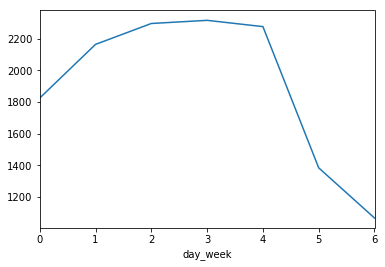

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

ridership_per_dat.plot()

In [16]:
weather_grouped.describe()

ENTRIESn  ENTRIESn_hourly        EXITSn  EXITSn_hourly  \
day_week                                                                     
0        count  7.010000e+03      7010.000000  7.010000e+03    7010.000000   
         mean   2.840276e+07      1825.264907  2.006446e+07    1304.046505   
         std    3.079376e+07      2934.884971  2.045408e+07    2173.994456   
         min    7.000000e+01         0.000000  8.100000e+01       0.000000   
         25%    1.046025e+07       252.000000  7.613840e+06     203.000000   
         50%    1.825701e+07       850.000000  1.335641e+07     596.000000   
         75%    3.307822e+07      2158.000000  2.428689e+07    1434.750000   
         max    2.162810e+08     31859.000000  1.482644e+08   29930.000000   
1        count  7.043000e+03      7043.000000  7.043000e+03    7043.000000   
         mean   2.846201e+07      2164.836433  2.013426e+07    1537.704955   
         std    3.038346e+07      3315.354470  2.028446e+07    2447.862802   
         min    0.000000e+00         0.000000  0.000000e+00       0.000000   
         25%    1.074110e+07       353.000000  7.764946e+06     250.500000   
         50%    1.860780e+07      1058.000000  1.366955e+07     739.000000   
         75%    3.355009e+07      2597.500000  2.420862e+07    1735.000000   
         max    2.018088e+08     32814.000000  1.365756e+08   33330.000000   
2        count  5.482000e+03      5482.000000  5.482000e+03    5482.000000   
         mean   2.759311e+07      2297.097957  1.954360e+07    1637.824152   
         std    2.992766e+07      3464.702585  2.002513e+07    2545.528412   
         min    0.000000e+00         0.000000  0.000000e+00       0.000000   
         25%    9.994658e+06       354.000000  7.577927e+06     275.250000   
         50%    1.801373e+07      1088.000000  1.324810e+07     840.500000   
         75%    3.245560e+07      2843.750000  2.366284e+07    1867.750000   
         max    2.357746e+08     32289.000000  1.493782e+08   33215.000000   
3        count  5.485000e+03      5485.000000  5.485000e+03    5485.000000   
         mean   2.774932e+07      2317.072379  1.959388e+07    1638.763537   
         std    3.013410e+07      3455.215477  2.009878e+07    2569.385828   
         min    0.000000e+00         0.000000  0.000000e+00       0.000000   
         25%    1.015256e+07       353.000000  7.581531e+06     283.000000   
         50%    1.807093e+07      1117.000000  1.322013e+07     826.000000   
         75%    3.239947e+07      2855.000000  2.339726e+07    1852.000000   
         max    2.292813e+08     30765.000000  1.366516e+08   34828.000000   
4        count  5.450000e+03      5450.000000  5.450000e+03    5450.000000   
         mean   2.798019e+07      2277.372294  1.972139e+07    1621.136514   
         std    3.040761e+07      3267.091419  2.017123e+07    2440.446004   
         min    0.000000e+00         0.000000  0.000000e+00       0.000000   
         25%    1.018912e+07       377.500000  7.601640e+06     301.000000   
         50%    1.817396e+07      1137.500000  1.328693e+07     835.000000   
         75%    3.220166e+07      2838.500000  2.369962e+07    1853.500000   
         max    2.064870e+08     32289.000000  1.341694e+08   30731.000000   
5        count  5.410000e+03      5410.000000  5.410000e+03    5410.000000   
         mean   2.809505e+07      1383.901479  1.984991e+07    1052.769316   
         std    3.045190e+07      1960.381787  2.035536e+07    1461.378978   
         min    0.000000e+00         0.000000  0.000000e+00       0.000000   
         25%    1.047060e+07       217.000000  7.708605e+06     225.000000   
         50%    1.811789e+07       752.000000  1.331150e+07     571.500000   
         75%    3.261715e+07      1720.750000  2.378745e+07    1279.750000   
         max    1.830170e+08     26753.000000  1.245552e+08   15682.000000   
6        count  6.769000e+03      6769.000000  6.769000e+03    6769.000000   
         mean   2.836150e+07      1066.436

These functions are not DF functions - they are GroupBy object functions.

### Other example

In [19]:
import numpy as np
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [21]:
# Examine groups
grouped_data = example_df.groupby('even')
grouped_data.groups

{False: Index(['a', 'b', 'e'], dtype='object'),
 True: Index(['c', 'd', 'f', 'g'], dtype='object')}

In [22]:
# Group by multiple columns
grouped_data = example_df.groupby(["even", "above_three"])
grouped_data.groups

{(False, False): Index(['a', 'b', 'e'], dtype='object'),
 (True, False): Index(['c'], dtype='object'),
 (True, True): Index(['d', 'f', 'g'], dtype='object')}

In [23]:
# Get sum of each group
grouped_data.sum()

value
even  above_three       
False False            5
True  False            2
      True            14

In [26]:
# Limit columns in result
grouped_data.sum()["value"]

even   above_three
False  False           5
True   False           2
       True           14
Name: value, dtype: int64

In [27]:
# You can also take a subset of columns from the grouped data before 
# collapsing to a DataFrame. In this case, the result is the same.
grouped_data['value'].sum()


even   above_three
False  False           5
True   False           2
       True           14
Name: value, dtype: int64

### Apply functions on groups.

In [24]:
import numpy as np

In [25]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
example_df

,above_three,even,value
a,False,False,1
b,False,False,3
c,False,True,2
d,True,True,4
e,False,False,1
f,True,True,6
g,True,True,4


In [28]:
def standardize(xs):
    return (xs - xs.mean()) / xs.std()

grouped_data = example_df.groupby("even")
grouped_data['value'].apply(standardize)

a   -0.577350
b    1.154701
c   -1.224745
d    0.000000
e   -0.577350
f    1.224745
g    0.000000
Name: value, dtype: float64

In [27]:
def second_largest(xs):
    sorted_xs = xs.sort(inplace=False, ascending=False)
    return sorted_xs.iloc[1]

grouped_data = example_df.groupby("even")
grouped_data["value"].apply(second_largest)


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


even
False    1
True     4
Name: value, dtype: int64

### Get hourly entries and exits diff.

In [44]:
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})
ridership_df

,ENTRIESn,EXITSn,TIMEn,UNIT
0,3144312,1088151,00:00:00,R051
1,8936644,13755385,02:00:00,R079
2,3144335,1088159,04:00:00,R051
3,8936658,13755393,06:00:00,R079
4,3144353,1088177,08:00:00,R051
5,8936687,13755598,10:00:00,R079
6,3144424,1088231,12:00:00,R051
7,8936819,13756191,14:00:00,R079
8,3144594,1088275,16:00:00,R051


In [45]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    grouped_entries = entries_and_exits.groupby("UNIT")
    return grouped_entries[["ENTRIESn", "EXITSn"]].apply(pd.DataFrame.diff)

In [46]:
get_hourly_entries_and_exits(ridership_df)

,ENTRIESn,EXITSn
0,NaN,NaN
1,NaN,NaN
2,23.0,8.0
3,14.0,8.0
4,18.0,18.0
5,29.0,205.0
6,71.0,54.0
7,132.0,593.0
8,170.0,44.0


## Combining Pandas DataFrames

We will use merge function on account key to merge enrollments and submissions tables.

```submissions.merge(enrollments, on="account_key", how="left")```

- left - we take rows from mleft table
- inner - only rows in both tables are kept
- right - data from right table would be kept even if not present in others (nans)
- outer - rows from both tables are kept

inner is the most common

In [47]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

In [48]:
subway_df

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135


In [49]:
weather_df

,DATEn,fog,hour,latitude,longitude,pressurei,rain,tempi,wspdi
0,05-01-11,0,0,40.689945,-73.872564,30.24,0,52.0,8.1
1,05-01-11,0,0,40.691320,-73.867135,30.24,0,52.0,8.1
2,05-02-11,0,0,40.689945,-73.872564,30.32,0,48.9,6.9
3,05-02-11,0,0,40.691320,-73.867135,30.32,0,48.9,6.9
4,05-03-11,0,0,40.689945,-73.872564,30.14,0,54.0,3.5
5,05-03-11,0,0,40.691320,-73.867135,30.14,0,54.0,3.5
6,05-04-11,0,0,40.689945,-73.872564,29.98,0,57.2,15.0
7,05-04-11,0,0,40.691320,-73.867135,29.98,0,57.2,15.0
8,05-05-11,0,0,40.689945,-73.872564,30.01,0,48.9,15.0
9,05-05-11,0,0,40.691320,-73.867135,30.01,0,48.9,15.0


In [55]:
'''
Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
and return a single dataframe with one row for each date, hour, and location. Only include
times and locations that have both subway data and weather data available.
'''
subway_df.merge(weather_df, on=["DATEn", "hour", "latitude", "longitude"], how="inner")

,DATEn,ENTRIESn,EXITSn,UNIT,hour,latitude,longitude,fog,pressurei,rain,tempi,wspdi
0,05-01-11,4388333,2911002,R003,0,40.689945,-73.872564,0,30.24,0,52.0,8.1
1,05-02-11,4388348,2911036,R003,0,40.689945,-73.872564,0,30.32,0,48.9,6.9
2,05-03-11,4389885,2912127,R003,0,40.689945,-73.872564,0,30.14,0,54.0,3.5
3,05-04-11,4391507,2913223,R003,0,40.689945,-73.872564,0,29.98,0,57.2,15.0
4,05-05-11,4393043,2914284,R003,0,40.689945,-73.872564,0,30.01,0,48.9,15.0
5,05-01-11,14656120,14451774,R004,0,40.691320,-73.867135,0,30.24,0,52.0,8.1
6,05-02-11,14656174,14451851,R004,0,40.691320,-73.867135,0,30.32,0,48.9,6.9
7,05-03-11,14660126,14454734,R004,0,40.691320,-73.867135,0,30.14,0,54.0,3.5
8,05-04-11,14664247,14457780,R004,0,40.691320,-73.867135,0,29.98,0,57.2,15.0
9,05-05-11,14668301,14460818,R004,0,40.691320,-73.867135,0,30.01,0,48.9,15.0


We can merge on multiple columns.

If columns names were not named the same we could you "left_on" and " right_on" parameters separately.

## Plotting with DataFrames

Just like Pandas Series, DataFrames also have a plot() method. If df is a DataFrame, then df.plot() will produce a line plot with a different colored line for each variable in the DataFrame. This can be a convenient way to get a quick look at your data, especially for small DataFrames, but for more complicated plots you will usually want to use matplotlib directly.

In [56]:
weather_df = pd.read_csv("nyc_subway_weather.csv")
weather_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


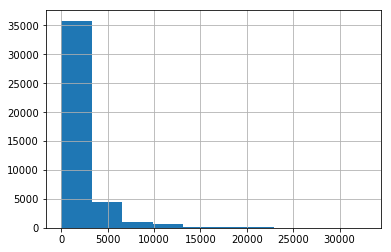

In [58]:
weather_df["ENTRIESn_hourly"].hist()

## Axis analysis

Pandas could create separate methods for columns and rows like drop_cols and drop rows, but it has a philosophy to use one method for all.

Instead we use one method and axis parameter to specify what we what to drop: row or a column.

Axes are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes

Axis 0 is the row axis running vertically downwards across rows (from up to down - column-wise).

Axis 1 is the column axis running running horizontally across columns (from left to right - row-wise).

```
+------------+---------+--------+
|            |  A      |  B     |
+------------+---------+---------
|      0     | 0.626386| 1.52325|----axis=1----->
+------------+---------+--------+
                |         |
                | axis=0  |
                ↓         ↓
```
Axis 0 is collapsing all numbers downwards.

Axis 1 is collapsing all numbers right.

So treat axis param as setting the direction of the operation.

In [8]:
import pandas as pd
import numpy as np

In [7]:
df = pd.DataFrame(data={"A": [1, 2, 3], 
                        "B": [4, 5, 6],
                        "C": [7, 8, 9]}, index=["x", "y", "z"])
df

,A,B,C
x,1,4,7
y,2,5,8
z,3,6,9


In [3]:
df.sum(axis=0)

A     6
B    15
C    24
dtype: int64

In [4]:
df.sum(axis=1)

x    12
y    15
z    18
dtype: int64

In [5]:
df.mean(axis=0)

A    2.0
B    5.0
C    8.0
dtype: float64

In [6]:
df.mean(axis=1)

x    4.0
y    5.0
z    6.0
dtype: float64

In [7]:
df.std(axis=0)

A    1.0
B    1.0
C    1.0
dtype: float64

In [8]:
df.std(axis=1)

x    3.0
y    3.0
z    3.0
dtype: float64

In [3]:
df.drop("x", axis=0)

,A,B,C
y,2,5,8
z,3,6,9


In [4]:
df.drop("A", axis=1)

,B,C
x,4,7
y,5,8
z,6,9


In [9]:
df = pd.DataFrame({"A": [1, 2, np.nan],
                   "B": [5, np.nan, np.nan],
                   "C": [1, 2, 3]})
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [10]:
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [11]:
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [12]:

a = np.array([[1, 55, 44], [99, 0, 2], [2, 11, 10]])
df = pd.DataFrame(data=a, index=["x", "y", "z"], columns=["A", "B", "C"])
df

,A,B,C
x,1,55,44
y,99,0,2
z,2,11,10


In [13]:
df.sort_values(by="A", axis=0)

,A,B,C
x,1,55,44
z,2,11,10
y,99,0,2


In [14]:
df.sort_values(by="y", axis=1)

,B,C,A
x,55,44,1
y,0,2,99
z,11,10,2


## Merge analysis

We will use merge function on account key to merge enrollments and submissions tables.

```submissions.merge(enrollments, on="account_key", how="left")```

- left - we take rows from mleft table
- inner - only rows in both tables are kept
- right - data from right table would be kept even if not present in others (nans)
- outer - rows from both tables are kept

inner is the most common

In [15]:
a = pd.DataFrame(data={"A": [0, 1, 2, 3], "B": [4, 5, 6, 7], "C": [8, 9, 10, 11]})
a

,A,B,C
0,0,4,8
1,1,5,9
2,2,6,10
3,3,7,11


In [18]:
b = pd.DataFrame(data={"B": [44, 5, 6, 77], "D": [0, 1, 2, 3], "E": [8, 9, 10, 11]})
b

,B,D,E
0,44,0,8
1,5,1,9
2,6,2,10
3,77,3,11


In [20]:
a.merge(b, on="B", how="inner")

,A,B,C,D,E
0,1,5,9,1,9
1,2,6,10,2,10


In [21]:
a.merge(b, on="B", how="left")

,A,B,C,D,E
0,0,4,8,NaN,NaN
1,1,5,9,1.0,9.0
2,2,6,10,2.0,10.0
3,3,7,11,NaN,NaN


In [22]:
a.merge(b, on="B", how="right")

,A,B,C,D,E
0,1.0,5,9.0,1,9
1,2.0,6,10.0,2,10
2,NaN,44,NaN,0,8
3,NaN,77,NaN,3,11


In [23]:
a.merge(b, on="B", how="outer")

,A,B,C,D,E
0,0.0,4,8.0,NaN,NaN
1,1.0,5,9.0,1.0,9.0
2,2.0,6,10.0,2.0,10.0
3,3.0,7,11.0,NaN,NaN
4,NaN,44,NaN,0.0,8.0
5,NaN,77,NaN,3.0,11.0


## Concatenation analysis

In [25]:
a = pd.DataFrame(data={"A": [0, 1, 2, 3], "B": [4, 5, 6, 7], "C": [8, 9, 10, 11]})
a

,A,B,C
0,0,4,8
1,1,5,9
2,2,6,10
3,3,7,11


In [26]:
b = pd.DataFrame(data={"B": [44, 5, 6, 77], "D": [0, 1, 2, 3], "E": [8, 9, 10, 11]})
b

,B,D,E
0,44,0,8
1,5,1,9
2,6,2,10
3,77,3,11


In [30]:
pd.concat([a, b], axis=0, join="outer")

,A,B,C,D,E
0,0.0,4,8.0,NaN,NaN
1,1.0,5,9.0,NaN,NaN
2,2.0,6,10.0,NaN,NaN
3,3.0,7,11.0,NaN,NaN
0,NaN,44,NaN,0.0,8.0
1,NaN,5,NaN,1.0,9.0
2,NaN,6,NaN,2.0,10.0
3,NaN,77,NaN,3.0,11.0


In [34]:
pd.concat([a, b], axis=0, join="inner")

,B
0,4
1,5
2,6
3,7
0,44
1,5
2,6
3,77


In [38]:
pd.concat([a, b], axis=1, join="outer")

,A,B,C,B,D,E
0,0,4,8,44,0,8
1,1,5,9,5,1,9
2,2,6,10,6,2,10
3,3,7,11,77,3,11


In [36]:
pd.concat([a, b], axis=1, join="inner")

,A,B,C,B,D,E
0,0,4,8,44,0,8
1,1,5,9,5,1,9
2,2,6,10,6,2,10
3,3,7,11,77,3,11


## Adding A DataFrame To A Series Analysis

### Matching index and columns

In [60]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

In [50]:
df

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [49]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [51]:
df + s

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


### Not matching index and columns

In [52]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    "A": [10, 20, 30, 40],
    "B": [50, 60, 70, 80],
    "C": [90, 100, 110, 120],
    "D": [130, 140, 150, 160]
})

In [53]:
df

,A,B,C,D
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [54]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [55]:
df + s

,A,B,C,D,0,1,2,3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Partially matching index and columns.


In [56]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    "A": [10, 20, 30, 40],
    2: [50, 60, 70, 80],
    3: [90, 100, 110, 120],
    "D": [130, 140, 150, 160]
})

In [57]:
df

,A,2,3,D
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [58]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [59]:
df + s

//anaconda/lib/python3.6/site-packages/pandas/indexes/base.py:2683: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,A,2,3,D,0,1
0,NaN,53.0,94.0,NaN,NaN,NaN
1,NaN,63.0,104.0,NaN,NaN,NaN
2,NaN,73.0,114.0,NaN,NaN,NaN
3,NaN,83.0,124.0,NaN,NaN,NaN


### Adding a Series to a one-row DataFrame

In [61]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3:[40]})

In [62]:
df

,0,1,2,3
0,10,20,30,40


In [63]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [64]:
df + s

,0,1,2,3
0,11,22,33,44


Again each value from the series was added to a single column from the DataFrame.

1 was added to the first column, 2 was added to the second and so on.

### Adding a Series to a one-column DataFrame

In [65]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({0: [10, 20, 30, 40]})

In [66]:
df

,0
0,10
1,20
2,30
3,40


In [67]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [68]:
df + s

,0,1,2,3
0,11,NaN,NaN,NaN
1,21,NaN,NaN,NaN
2,31,NaN,NaN,NaN
3,41,NaN,NaN,NaN


The result has four columns - one for each value in the series - and every column except the first one contains NaNs.

The first column have one added to each column as before.

### Adding a Series to a square DataFrame - short Series

In [78]:
s = pd.Series([1, 2, 3])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

In [79]:
df

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [80]:
s

0    1
1    2
2    3
dtype: int64

In [81]:
df + s

,0,1,2,3
0,11.0,52.0,93.0,NaN
1,21.0,62.0,103.0,NaN
2,31.0,72.0,113.0,NaN
3,41.0,82.0,123.0,NaN


The result is similar to when we added Series and the index did not match.

For each letter that was not present in both the DataFrame and Series the result is NaN.

Other values were matched by letters.

Summary: 
- Adding a DataFrame to a Series, adds each vakue of the Series to one column of the DataFrame.
- It matches up the Series to the DataFrane using the index of the Series and the column names of the DataFrame.

## Adding with add function axis='0' and axis='1' analysis

### Matching index and columns

In [82]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    0: [10, 20, 30, 40],
    1: [50, 60, 70, 80],
    2: [90, 100, 110, 120],
    3: [130, 140, 150, 160]
})

In [86]:
df 

,0,1,2,3
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [84]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [87]:
df.add(s, axis=0)

,0,1,2,3
0,11,51,91,131
1,22,62,102,142
2,33,73,113,153
3,44,84,124,164


In [88]:
df.add(s, axis=1)

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


In [89]:
df + s

,0,1,2,3
0,11,52,93,134
1,21,62,103,144
2,31,72,113,154
3,41,82,123,164


In [1]:
### Not matching index and columns

In [90]:
s = pd.Series([1, 2, 3, 4])
df = pd.DataFrame({
    "A": [10, 20, 30, 40],
    "B": [50, 60, 70, 80],
    "C": [90, 100, 110, 120],
    "D": [130, 140, 150, 160]
})

In [91]:
df

,A,B,C,D
0,10,50,90,130
1,20,60,100,140
2,30,70,110,150
3,40,80,120,160


In [92]:
s

0    1
1    2
2    3
3    4
dtype: int64

In [93]:
df.add(s, axis=0)

,A,B,C,D
0,11,51,91,131
1,22,62,102,142
2,33,73,113,153
3,44,84,124,164


In [94]:
df.add(s, axis=1)

,A,B,C,D,0,1,2,3
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The functions sub(), mul(), and div() work similarly to add().